In [1]:
#  imports 
import numpy as np
import pandas as pd
from math import sqrt 
from pprint import pprint
from numpy import array
from time import time

In [3]:
# load data
df=pd.read_csv('Shuttle_withoutdupl_norm_v06.csv')

del df['id']
del df['Unnamed: 0']
df['outlier'] = df.outlier.apply(lambda label: 1 if label == "'yes'" else 0)

df.head()

,att1,att2,att3,att4,att5,att6,att7,att8,att9,outlier
0,0.172414,0.395722,0.12766,0.051976,0.198864,0.01276,0.483516,0.749216,0.737113,1
1,0.068966,0.395722,0.12766,0.051976,0.198864,0.01276,0.571429,0.749216,0.716495,1
2,0.160920,0.395722,0.12766,0.051976,0.056818,0.01276,0.494505,0.915361,0.871134,1
3,0.068966,0.390374,0.12766,0.051976,0.198864,0.01276,0.582418,0.749216,0.716495,1
4,0.149425,0.438503,0.12766,0.051976,0.056818,0.01276,0.505495,0.915361,0.865979,1


In [4]:
# df to values
df = df.values

In [5]:
# Deep ExtraTrees
import argparse
import numpy as np
import sys
import pickle
from sklearn.metrics import accuracy_score
sys.path.insert(0, "lib")
from gcforest.gcforest import GCForest
from gcforest.utils.config_utils import load_json
config = load_json("./examples/Shuttle.json")  
gc = GCForest(config)

In [19]:
# train test
from sklearn.cross_validation import train_test_split
y = df[:,9]
X = df[:,0:9]

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [7]:
# count class
len(np.unique(y_train))

2

In [8]:
  # X_enc is the concatenated predict_proba result of CascadeExtraTrees

X_train_enc, X_test_enc = gc.fit_transform(X_train, y_train, X_test=X_test, y_test=y_test)
  

[ 2018-07-31 01:32:54,536][cascade_classifier.fit_transform] X_groups_train.shape=[(709, 9)],y_train.shape=(709,),X_groups_test.shape=[(304, 9)],y_test.shape=(304,)
[ 2018-07-31 01:32:54,538][cascade_classifier.fit_transform] group_dims=[9]
[ 2018-07-31 01:32:54,538][cascade_classifier.fit_transform] group_starts=[0]
[ 2018-07-31 01:32:54,539][cascade_classifier.fit_transform] group_ends=[9]
[ 2018-07-31 01:32:54,540][cascade_classifier.fit_transform] X_train.shape=(709, 9),X_test.shape=(304, 9)
[ 2018-07-31 01:32:54,541][cascade_classifier.fit_transform] [layer=0] look_indexs=[0], X_cur_train.shape=(709, 9), X_cur_test.shape=(304, 9)
/home/ubuntu/anaconda2/lib/python2.7/site-packages/sklearn/model_selection/_split.py:581: Warning: The least populated class in y has only 8 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
[ 2018-07-31 01:32:55,267][kfold_wrapper.log_eval_metrics] Accuracy(la

In [9]:
# predict
y_pred = gc.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Test Accuracy of CascadeExtraTrees = {:.6f} %".format(acc * 100))
 # Matrix de confusion
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print('\n')
print(classification_report(y_test,y_pred))

[ 2018-07-31 01:33:05,107][cascade_classifier.transform] X_groups_test.shape=[(304, 9)]
[ 2018-07-31 01:33:05,108][cascade_classifier.transform] group_dims=[9]
[ 2018-07-31 01:33:05,115][cascade_classifier.transform] X_test.shape=(304, 9)
[ 2018-07-31 01:33:05,116][cascade_classifier.transform] [layer=0] look_indexs=[0], X_cur_test.shape=(304, 9)


Test Accuracy of CascadeExtraTrees = 99.671053 %
[[298   1]
 [  0   5]]


             precision    recall  f1-score   support

        0.0       1.00      1.00      1.00       299
        1.0       0.83      1.00      0.91         5

avg / total       1.00      1.00      1.00       304



In [10]:
#  predict_proba + Data 
X_test_enc = gc.transform(X_test)
X_train_enc = X_train_enc.reshape((X_train_enc.shape[0], -1))
X_test_enc = X_test_enc.reshape((X_test_enc.shape[0], -1))
X_train_origin = X_train.reshape((X_train.shape[0], -1))
X_test_origin = X_test.reshape((X_test.shape[0], -1))
X_train_enc = np.hstack((X_train_origin, X_train_enc))
X_test_enc = np.hstack((X_test_origin, X_test_enc))

[ 2018-07-31 01:33:07,578][cascade_classifier.transform] X_groups_test.shape=[(304, 9)]
[ 2018-07-31 01:33:07,592][cascade_classifier.transform] group_dims=[9]
[ 2018-07-31 01:33:07,593][cascade_classifier.transform] X_test.shape=(304, 9)
[ 2018-07-31 01:33:07,594][cascade_classifier.transform] [layer=0] look_indexs=[0], X_cur_test.shape=(304, 9)


In [11]:
# New data
X_train_new = X_train_enc
X_test_new  = X_test_enc

In [12]:
X_test_new.shape

(304, 11)

In [13]:
X_train_new.shape

(709, 11)

In [14]:
# Cascade ExtraTrees
config = load_json("./examples/Shuttlegc.json")  
gc = GCForest(config)

X_train=X_train_enc
X_test=X_test_enc 
X_train_enc, X_test_enc = gc.fit_transform(X_train, y_train, X_test=X_test, y_test=y_test)

[ 2018-07-31 01:33:09,934][cascade_classifier.fit_transform] X_groups_train.shape=[(709, 11)],y_train.shape=(709,),X_groups_test.shape=[(304, 11)],y_test.shape=(304,)
[ 2018-07-31 01:33:09,935][cascade_classifier.fit_transform] group_dims=[11]
[ 2018-07-31 01:33:09,935][cascade_classifier.fit_transform] group_starts=[0]
[ 2018-07-31 01:33:09,936][cascade_classifier.fit_transform] group_ends=[11]
[ 2018-07-31 01:33:09,937][cascade_classifier.fit_transform] X_train.shape=(709, 11),X_test.shape=(304, 11)
[ 2018-07-31 01:33:09,939][cascade_classifier.fit_transform] [layer=0] look_indexs=[0], X_cur_train.shape=(709, 11), X_cur_test.shape=(304, 11)
[ 2018-07-31 01:33:10,684][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=100.00%
[ 2018-07-31 01:33:11,602][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=100.00%
[ 2018-07-31 01:33:12,490][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_fo

In [15]:
y_pred = gc.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Test Accuracy of CascadeExtraTrees = {:.6f} %".format(acc * 100))
 # Matrix de confusion
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print('\n')
print(classification_report(y_test,y_pred))

[ 2018-07-31 01:33:45,164][cascade_classifier.transform] X_groups_test.shape=[(304, 11)]
[ 2018-07-31 01:33:45,166][cascade_classifier.transform] group_dims=[11]
[ 2018-07-31 01:33:45,167][cascade_classifier.transform] X_test.shape=(304, 11)
[ 2018-07-31 01:33:45,169][cascade_classifier.transform] [layer=0] look_indexs=[0], X_cur_test.shape=(304, 11)


Test Accuracy of CascadeExtraTrees = 99.342105 %
[[297   2]
 [  0   5]]


             precision    recall  f1-score   support

        0.0       1.00      0.99      1.00       299
        1.0       0.71      1.00      0.83         5

avg / total       1.00      0.99      0.99       304



In [16]:
# CascadeExtraTrees
def update(X_train,X_test):
    # update Estimators
    M = np.delete(X_train, (-1), axis=1)
    X_train= np.delete(M, (-1), axis=1)
    M = np.delete(X_test, (-1), axis=1)
    X_test = np.delete(M, (-1), axis=1)
    return X_train,X_test

def newdata(X_test_enc, X_train_enc):
    # Make Data + Estimators
    X_train_origin = X_train.reshape((X_train.shape[0], -1))
    X_test_origin = X_test.reshape((X_test.shape[0], -1))
    X_train_enc = np.hstack((X_train_origin, X_train_enc))
    X_test_enc = np.hstack((X_test_origin, X_test_enc))
    return X_test_enc, X_train_enc

Accuracy = []
def affiche():
    # predict
    y_pred = gc.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print("Test Accuracy of CascadeExtraTrees = {:.6f} %".format(acc * 100),"Layer :",i)
    Accuracy.append(round(acc*100 , 2))
    # Matrix de confusion
    from sklearn.metrics import classification_report, confusion_matrix
    print(confusion_matrix(y_test,y_pred))
    print('\n')
    print(classification_report(y_test,y_pred))   
    
    
# Deep
t = []
for i in range (20):
    t0 = time()
    X_train,X_test=update(X_train,X_test)
    X_test_enc, X_train_enc=newdata(X_test_enc, X_train_enc)

    X_train=X_train_enc
    X_test=X_test_enc 
    
    config = load_json("./examples/Shuttlegc.json")  
    gc = GCForest(config)
    X_train_enc, X_test_enc = gc.fit_transform(X_train, y_train, X_test=X_test, y_test=y_test) 
    tt = time() - t0
    affiche() 
    t.append(round(tt,2))
    print (" Time ",format(round(tt,3))," seconds")

[ 2018-07-31 01:33:47,456][cascade_classifier.fit_transform] X_groups_train.shape=[(709, 11)],y_train.shape=(709,),X_groups_test.shape=[(304, 11)],y_test.shape=(304,)
[ 2018-07-31 01:33:47,459][cascade_classifier.fit_transform] group_dims=[11]
[ 2018-07-31 01:33:47,461][cascade_classifier.fit_transform] group_starts=[0]
[ 2018-07-31 01:33:47,462][cascade_classifier.fit_transform] group_ends=[11]
[ 2018-07-31 01:33:47,463][cascade_classifier.fit_transform] X_train.shape=(709, 11),X_test.shape=(304, 11)
[ 2018-07-31 01:33:47,466][cascade_classifier.fit_transform] [layer=0] look_indexs=[0], X_cur_train.shape=(709, 11), X_cur_test.shape=(304, 11)
[ 2018-07-31 01:33:48,156][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=100.00%
[ 2018-07-31 01:33:49,140][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=100.00%
[ 2018-07-31 01:33:50,017][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_fo

[ 2018-07-31 01:34:23,495][cascade_classifier.transform] group_dims=[11]
[ 2018-07-31 01:34:23,500][cascade_classifier.transform] X_test.shape=(304, 11)
[ 2018-07-31 01:34:23,501][cascade_classifier.transform] [layer=0] look_indexs=[0], X_cur_test.shape=(304, 11)
[ 2018-07-31 01:34:25,903][cascade_classifier.fit_transform] X_groups_train.shape=[(709, 11)],y_train.shape=(709,),X_groups_test.shape=[(304, 11)],y_test.shape=(304,)
[ 2018-07-31 01:34:25,904][cascade_classifier.fit_transform] group_dims=[11]
[ 2018-07-31 01:34:25,906][cascade_classifier.fit_transform] group_starts=[0]
[ 2018-07-31 01:34:25,907][cascade_classifier.fit_transform] group_ends=[11]
[ 2018-07-31 01:34:25,908][cascade_classifier.fit_transform] X_train.shape=(709, 11),X_test.shape=(304, 11)
[ 2018-07-31 01:34:25,909][cascade_classifier.fit_transform] [layer=0] look_indexs=[0], X_cur_train.shape=(709, 11), X_cur_test.shape=(304, 11)


('Test Accuracy of CascadeExtraTrees = 99.342105 %', 'Layer :', 0)
[[297   2]
 [  0   5]]


             precision    recall  f1-score   support

        0.0       1.00      0.99      1.00       299
        1.0       0.71      1.00      0.83         5

avg / total       1.00      0.99      0.99       304

(' Time ', '36.039', ' seconds')


[ 2018-07-31 01:34:26,641][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=100.00%
[ 2018-07-31 01:34:27,547][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=100.00%
[ 2018-07-31 01:34:28,464][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=100.00%
[ 2018-07-31 01:34:29,346][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=100.00%
[ 2018-07-31 01:34:30,261][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=100.00%
[ 2018-07-31 01:34:31,154][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=100.00%
[ 2018-07-31 01:34:32,055][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=100.00%
[ 2018-07-31 01:34:32,927][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=

[ 2018-07-31 01:35:04,327][cascade_classifier.fit_transform] group_ends=[11]
[ 2018-07-31 01:35:04,327][cascade_classifier.fit_transform] X_train.shape=(709, 11),X_test.shape=(304, 11)
[ 2018-07-31 01:35:04,328][cascade_classifier.fit_transform] [layer=0] look_indexs=[0], X_cur_train.shape=(709, 11), X_cur_test.shape=(304, 11)


('Test Accuracy of CascadeExtraTrees = 99.342105 %', 'Layer :', 1)
[[297   2]
 [  0   5]]


             precision    recall  f1-score   support

        0.0       1.00      0.99      1.00       299
        1.0       0.71      1.00      0.83         5

avg / total       1.00      0.99      0.99       304

(' Time ', '36.197', ' seconds')


[ 2018-07-31 01:35:04,999][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=100.00%
[ 2018-07-31 01:35:05,920][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=100.00%
[ 2018-07-31 01:35:06,845][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=100.00%
[ 2018-07-31 01:35:07,762][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=100.00%
[ 2018-07-31 01:35:08,739][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=100.00%
[ 2018-07-31 01:35:09,624][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=100.00%
[ 2018-07-31 01:35:10,488][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=100.00%
[ 2018-07-31 01:35:11,391][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=

[ 2018-07-31 01:35:42,516][cascade_classifier.fit_transform] group_ends=[11]
[ 2018-07-31 01:35:42,517][cascade_classifier.fit_transform] X_train.shape=(709, 11),X_test.shape=(304, 11)
[ 2018-07-31 01:35:42,518][cascade_classifier.fit_transform] [layer=0] look_indexs=[0], X_cur_train.shape=(709, 11), X_cur_test.shape=(304, 11)


('Test Accuracy of CascadeExtraTrees = 99.342105 %', 'Layer :', 2)
[[297   2]
 [  0   5]]


             precision    recall  f1-score   support

        0.0       1.00      0.99      1.00       299
        1.0       0.71      1.00      0.83         5

avg / total       1.00      0.99      0.99       304

(' Time ', '35.845', ' seconds')


[ 2018-07-31 01:35:43,227][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=100.00%
[ 2018-07-31 01:35:44,218][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=100.00%
[ 2018-07-31 01:35:45,147][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=100.00%
[ 2018-07-31 01:35:46,150][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=100.00%
[ 2018-07-31 01:35:47,103][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=100.00%
[ 2018-07-31 01:35:48,085][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=100.00%
[ 2018-07-31 01:35:49,003][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=100.00%
[ 2018-07-31 01:35:49,923][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=

[ 2018-07-31 01:36:20,889][cascade_classifier.fit_transform] group_ends=[11]
[ 2018-07-31 01:36:20,891][cascade_classifier.fit_transform] X_train.shape=(709, 11),X_test.shape=(304, 11)
[ 2018-07-31 01:36:20,892][cascade_classifier.fit_transform] [layer=0] look_indexs=[0], X_cur_train.shape=(709, 11), X_cur_test.shape=(304, 11)


('Test Accuracy of CascadeExtraTrees = 99.342105 %', 'Layer :', 3)
[[297   2]
 [  0   5]]


             precision    recall  f1-score   support

        0.0       1.00      0.99      1.00       299
        1.0       0.71      1.00      0.83         5

avg / total       1.00      0.99      0.99       304

(' Time ', '36.059', ' seconds')


[ 2018-07-31 01:36:21,563][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=100.00%
[ 2018-07-31 01:36:22,450][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=100.00%
[ 2018-07-31 01:36:23,355][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=100.00%
[ 2018-07-31 01:36:24,255][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=100.00%
[ 2018-07-31 01:36:25,130][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=100.00%
[ 2018-07-31 01:36:26,016][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=100.00%
[ 2018-07-31 01:36:26,958][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=100.00%
[ 2018-07-31 01:36:27,886][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=

[ 2018-07-31 01:36:58,961][cascade_classifier.fit_transform] group_ends=[11]
[ 2018-07-31 01:36:58,962][cascade_classifier.fit_transform] X_train.shape=(709, 11),X_test.shape=(304, 11)
[ 2018-07-31 01:36:58,964][cascade_classifier.fit_transform] [layer=0] look_indexs=[0], X_cur_train.shape=(709, 11), X_cur_test.shape=(304, 11)


('Test Accuracy of CascadeExtraTrees = 99.342105 %', 'Layer :', 4)
[[297   2]
 [  0   5]]


             precision    recall  f1-score   support

        0.0       1.00      0.99      1.00       299
        1.0       0.71      1.00      0.83         5

avg / total       1.00      0.99      0.99       304

(' Time ', '35.779', ' seconds')


[ 2018-07-31 01:36:59,600][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=100.00%
[ 2018-07-31 01:37:00,477][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=100.00%
[ 2018-07-31 01:37:01,432][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=100.00%
[ 2018-07-31 01:37:02,290][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=100.00%
[ 2018-07-31 01:37:03,188][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=100.00%
[ 2018-07-31 01:37:04,067][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=100.00%
[ 2018-07-31 01:37:04,941][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=100.00%
[ 2018-07-31 01:37:05,771][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=

[ 2018-07-31 01:37:37,705][cascade_classifier.fit_transform] group_ends=[11]
[ 2018-07-31 01:37:37,706][cascade_classifier.fit_transform] X_train.shape=(709, 11),X_test.shape=(304, 11)
[ 2018-07-31 01:37:37,707][cascade_classifier.fit_transform] [layer=0] look_indexs=[0], X_cur_train.shape=(709, 11), X_cur_test.shape=(304, 11)


('Test Accuracy of CascadeExtraTrees = 99.342105 %', 'Layer :', 5)
[[297   2]
 [  0   5]]


             precision    recall  f1-score   support

        0.0       1.00      0.99      1.00       299
        1.0       0.71      1.00      0.83         5

avg / total       1.00      0.99      0.99       304

(' Time ', '36.417', ' seconds')


[ 2018-07-31 01:37:38,382][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=100.00%
[ 2018-07-31 01:37:39,296][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=100.00%
[ 2018-07-31 01:37:40,187][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=100.00%
[ 2018-07-31 01:37:41,125][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=100.00%
[ 2018-07-31 01:37:42,117][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=100.00%
[ 2018-07-31 01:37:43,018][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=100.00%
[ 2018-07-31 01:37:43,911][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=100.00%
[ 2018-07-31 01:37:44,665][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=

[ 2018-07-31 01:38:16,190][cascade_classifier.fit_transform] group_ends=[11]
[ 2018-07-31 01:38:16,192][cascade_classifier.fit_transform] X_train.shape=(709, 11),X_test.shape=(304, 11)
[ 2018-07-31 01:38:16,193][cascade_classifier.fit_transform] [layer=0] look_indexs=[0], X_cur_train.shape=(709, 11), X_cur_test.shape=(304, 11)


('Test Accuracy of CascadeExtraTrees = 99.342105 %', 'Layer :', 6)
[[297   2]
 [  0   5]]


             precision    recall  f1-score   support

        0.0       1.00      0.99      1.00       299
        1.0       0.71      1.00      0.83         5

avg / total       1.00      0.99      0.99       304

(' Time ', '36.258', ' seconds')


[ 2018-07-31 01:38:16,869][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=100.00%
[ 2018-07-31 01:38:17,762][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=100.00%
[ 2018-07-31 01:38:18,645][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=100.00%
[ 2018-07-31 01:38:19,577][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=100.00%
[ 2018-07-31 01:38:20,453][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=100.00%
[ 2018-07-31 01:38:21,381][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=100.00%
[ 2018-07-31 01:38:22,256][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=100.00%
[ 2018-07-31 01:38:23,156][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=

[ 2018-07-31 01:38:54,772][cascade_classifier.fit_transform] group_ends=[11]
[ 2018-07-31 01:38:54,773][cascade_classifier.fit_transform] X_train.shape=(709, 11),X_test.shape=(304, 11)
[ 2018-07-31 01:38:54,774][cascade_classifier.fit_transform] [layer=0] look_indexs=[0], X_cur_train.shape=(709, 11), X_cur_test.shape=(304, 11)


('Test Accuracy of CascadeExtraTrees = 99.342105 %', 'Layer :', 7)
[[297   2]
 [  0   5]]


             precision    recall  f1-score   support

        0.0       1.00      0.99      1.00       299
        1.0       0.71      1.00      0.83         5

avg / total       1.00      0.99      0.99       304

(' Time ', '36.239', ' seconds')


[ 2018-07-31 01:38:55,413][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=100.00%
[ 2018-07-31 01:38:56,287][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=100.00%
[ 2018-07-31 01:38:57,155][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=100.00%
[ 2018-07-31 01:38:58,021][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=100.00%
[ 2018-07-31 01:38:58,906][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=100.00%
[ 2018-07-31 01:38:59,817][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=100.00%
[ 2018-07-31 01:39:00,677][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=100.00%
[ 2018-07-31 01:39:01,550][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=

[ 2018-07-31 01:39:32,991][cascade_classifier.fit_transform] group_ends=[11]
[ 2018-07-31 01:39:32,992][cascade_classifier.fit_transform] X_train.shape=(709, 11),X_test.shape=(304, 11)
[ 2018-07-31 01:39:32,993][cascade_classifier.fit_transform] [layer=0] look_indexs=[0], X_cur_train.shape=(709, 11), X_cur_test.shape=(304, 11)


('Test Accuracy of CascadeExtraTrees = 99.342105 %', 'Layer :', 8)
[[297   2]
 [  0   5]]


             precision    recall  f1-score   support

        0.0       1.00      0.99      1.00       299
        1.0       0.71      1.00      0.83         5

avg / total       1.00      0.99      0.99       304

(' Time ', '35.898', ' seconds')


[ 2018-07-31 01:39:33,659][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=100.00%
[ 2018-07-31 01:39:34,573][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=100.00%
[ 2018-07-31 01:39:35,489][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=100.00%
[ 2018-07-31 01:39:36,408][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=100.00%
[ 2018-07-31 01:39:37,285][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=100.00%
[ 2018-07-31 01:39:38,151][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=100.00%
[ 2018-07-31 01:39:39,057][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=100.00%
[ 2018-07-31 01:39:39,981][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=

[ 2018-07-31 01:40:11,524][cascade_classifier.fit_transform] group_ends=[11]
[ 2018-07-31 01:40:11,525][cascade_classifier.fit_transform] X_train.shape=(709, 11),X_test.shape=(304, 11)
[ 2018-07-31 01:40:11,525][cascade_classifier.fit_transform] [layer=0] look_indexs=[0], X_cur_train.shape=(709, 11), X_cur_test.shape=(304, 11)


('Test Accuracy of CascadeExtraTrees = 99.342105 %', 'Layer :', 9)
[[297   2]
 [  0   5]]


             precision    recall  f1-score   support

        0.0       1.00      0.99      1.00       299
        1.0       0.71      1.00      0.83         5

avg / total       1.00      0.99      0.99       304

(' Time ', '36.202', ' seconds')


[ 2018-07-31 01:40:12,135][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=100.00%
[ 2018-07-31 01:40:13,004][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=100.00%
[ 2018-07-31 01:40:13,869][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=100.00%
[ 2018-07-31 01:40:14,752][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=100.00%
[ 2018-07-31 01:40:15,620][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=100.00%
[ 2018-07-31 01:40:16,517][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=98.59%
[ 2018-07-31 01:40:17,435][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=100.00%
[ 2018-07-31 01:40:18,340][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=1

[ 2018-07-31 01:40:50,724][cascade_classifier.fit_transform] X_train.shape=(709, 11),X_test.shape=(304, 11)
[ 2018-07-31 01:40:50,725][cascade_classifier.fit_transform] [layer=0] look_indexs=[0], X_cur_train.shape=(709, 11), X_cur_test.shape=(304, 11)


('Test Accuracy of CascadeExtraTrees = 99.342105 %', 'Layer :', 10)
[[297   2]
 [  0   5]]


             precision    recall  f1-score   support

        0.0       1.00      0.99      1.00       299
        1.0       0.71      1.00      0.83         5

avg / total       1.00      0.99      0.99       304

(' Time ', '36.979', ' seconds')


[ 2018-07-31 01:40:51,366][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=100.00%
[ 2018-07-31 01:40:52,259][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=100.00%
[ 2018-07-31 01:40:53,131][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=100.00%
[ 2018-07-31 01:40:54,013][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=100.00%
[ 2018-07-31 01:40:54,919][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=98.59%
[ 2018-07-31 01:40:55,807][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=98.59%
[ 2018-07-31 01:40:56,678][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=100.00%
[ 2018-07-31 01:40:57,557][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=10

[ 2018-07-31 01:41:28,547][cascade_classifier.fit_transform] X_train.shape=(709, 11),X_test.shape=(304, 11)
[ 2018-07-31 01:41:28,548][cascade_classifier.fit_transform] [layer=0] look_indexs=[0], X_cur_train.shape=(709, 11), X_cur_test.shape=(304, 11)


('Test Accuracy of CascadeExtraTrees = 99.342105 %', 'Layer :', 11)
[[297   2]
 [  0   5]]


             precision    recall  f1-score   support

        0.0       1.00      0.99      1.00       299
        1.0       0.71      1.00      0.83         5

avg / total       1.00      0.99      0.99       304

(' Time ', '35.519', ' seconds')


[ 2018-07-31 01:41:29,239][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=100.00%
[ 2018-07-31 01:41:30,029][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=100.00%
[ 2018-07-31 01:41:30,921][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=100.00%
[ 2018-07-31 01:41:31,811][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=100.00%
[ 2018-07-31 01:41:32,686][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=98.59%
[ 2018-07-31 01:41:33,592][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=98.59%
[ 2018-07-31 01:41:34,473][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=100.00%
[ 2018-07-31 01:41:35,367][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=10

[ 2018-07-31 01:42:06,881][cascade_classifier.fit_transform] X_train.shape=(709, 11),X_test.shape=(304, 11)
[ 2018-07-31 01:42:06,883][cascade_classifier.fit_transform] [layer=0] look_indexs=[0], X_cur_train.shape=(709, 11), X_cur_test.shape=(304, 11)


('Test Accuracy of CascadeExtraTrees = 99.342105 %', 'Layer :', 12)
[[297   2]
 [  0   5]]


             precision    recall  f1-score   support

        0.0       1.00      0.99      1.00       299
        1.0       0.71      1.00      0.83         5

avg / total       1.00      0.99      0.99       304

(' Time ', '36.023', ' seconds')


[ 2018-07-31 01:42:07,621][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=100.00%
[ 2018-07-31 01:42:08,493][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=100.00%
[ 2018-07-31 01:42:09,428][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=100.00%
[ 2018-07-31 01:42:10,314][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=100.00%
[ 2018-07-31 01:42:11,206][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=98.59%
[ 2018-07-31 01:42:12,112][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=100.00%
[ 2018-07-31 01:42:13,015][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=100.00%
[ 2018-07-31 01:42:13,913][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=1

[ 2018-07-31 01:42:45,824][cascade_classifier.fit_transform] X_train.shape=(709, 11),X_test.shape=(304, 11)
[ 2018-07-31 01:42:45,826][cascade_classifier.fit_transform] [layer=0] look_indexs=[0], X_cur_train.shape=(709, 11), X_cur_test.shape=(304, 11)


('Test Accuracy of CascadeExtraTrees = 99.342105 %', 'Layer :', 13)
[[297   2]
 [  0   5]]


             precision    recall  f1-score   support

        0.0       1.00      0.99      1.00       299
        1.0       0.71      1.00      0.83         5

avg / total       1.00      0.99      0.99       304

(' Time ', '36.54', ' seconds')


[ 2018-07-31 01:42:46,482][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=100.00%
[ 2018-07-31 01:42:47,482][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=100.00%
[ 2018-07-31 01:42:48,458][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=100.00%
[ 2018-07-31 01:42:49,382][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=100.00%
[ 2018-07-31 01:42:50,274][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=100.00%
[ 2018-07-31 01:42:51,172][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=100.00%
[ 2018-07-31 01:42:51,999][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=100.00%
[ 2018-07-31 01:42:52,932][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=

[ 2018-07-31 01:43:24,270][cascade_classifier.fit_transform] X_train.shape=(709, 11),X_test.shape=(304, 11)
[ 2018-07-31 01:43:24,272][cascade_classifier.fit_transform] [layer=0] look_indexs=[0], X_cur_train.shape=(709, 11), X_cur_test.shape=(304, 11)


('Test Accuracy of CascadeExtraTrees = 98.684211 %', 'Layer :', 14)
[[295   4]
 [  0   5]]


             precision    recall  f1-score   support

        0.0       1.00      0.99      0.99       299
        1.0       0.56      1.00      0.71         5

avg / total       0.99      0.99      0.99       304

(' Time ', '36.047', ' seconds')


[ 2018-07-31 01:43:25,027][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=100.00%
[ 2018-07-31 01:43:25,998][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=100.00%
[ 2018-07-31 01:43:27,079][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=100.00%
[ 2018-07-31 01:43:28,013][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=100.00%
[ 2018-07-31 01:43:28,845][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=98.59%
[ 2018-07-31 01:43:29,742][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=100.00%
[ 2018-07-31 01:43:30,639][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=100.00%
[ 2018-07-31 01:43:31,564][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=1

[ 2018-07-31 01:44:03,398][cascade_classifier.fit_transform] X_train.shape=(709, 11),X_test.shape=(304, 11)
[ 2018-07-31 01:44:03,399][cascade_classifier.fit_transform] [layer=0] look_indexs=[0], X_cur_train.shape=(709, 11), X_cur_test.shape=(304, 11)


('Test Accuracy of CascadeExtraTrees = 99.013158 %', 'Layer :', 15)
[[296   3]
 [  0   5]]


             precision    recall  f1-score   support

        0.0       1.00      0.99      0.99       299
        1.0       0.62      1.00      0.77         5

avg / total       0.99      0.99      0.99       304

(' Time ', '36.786', ' seconds')


[ 2018-07-31 01:44:04,147][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=100.00%
[ 2018-07-31 01:44:05,019][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=100.00%
[ 2018-07-31 01:44:05,917][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=100.00%
[ 2018-07-31 01:44:06,880][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=100.00%
[ 2018-07-31 01:44:07,789][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=98.59%
[ 2018-07-31 01:44:08,736][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=98.59%
[ 2018-07-31 01:44:09,630][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=100.00%
[ 2018-07-31 01:44:10,507][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=10

[ 2018-07-31 01:44:45,975][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_6.predict)=98.59%
[ 2018-07-31 01:44:46,949][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_7.predict)=98.59%
[ 2018-07-31 01:44:47,905][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_8.predict)=100.00%
[ 2018-07-31 01:44:48,893][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_9.predict)=98.57%
[ 2018-07-31 01:44:49,128][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_cv.predict)=99.29%
[ 2018-07-31 01:44:49,130][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.test.predict)=99.01%
[ 2018-07-31 01:44:49,131][cascade_classifier.calc_accuracy] Accuracy(layer_4 - train.classifier_average)=99.29%
[ 2018-07-31 01:44:49,132][cascade_classifier.calc_accuracy] Accuracy(layer_4 - test.classifier_average)=99.01%
[ 2018-07-31 01:44:49,134]

('Test Accuracy of CascadeExtraTrees = 99.342105 %', 'Layer :', 16)
[[297   2]
 [  0   5]]


             precision    recall  f1-score   support

        0.0       1.00      0.99      1.00       299
        1.0       0.71      1.00      0.83         5

avg / total       1.00      0.99      0.99       304

(' Time ', '54.737', ' seconds')


[ 2018-07-31 01:45:05,812][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=100.00%
[ 2018-07-31 01:45:06,705][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=100.00%
[ 2018-07-31 01:45:07,580][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=100.00%
[ 2018-07-31 01:45:08,462][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=100.00%
[ 2018-07-31 01:45:09,368][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=100.00%
[ 2018-07-31 01:45:10,284][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=100.00%
[ 2018-07-31 01:45:11,175][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=100.00%
[ 2018-07-31 01:45:11,960][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=

[ 2018-07-31 01:45:45,158][cascade_classifier.fit_transform] X_train.shape=(709, 11),X_test.shape=(304, 11)
[ 2018-07-31 01:45:45,160][cascade_classifier.fit_transform] [layer=0] look_indexs=[0], X_cur_train.shape=(709, 11), X_cur_test.shape=(304, 11)


('Test Accuracy of CascadeExtraTrees = 99.342105 %', 'Layer :', 17)
[[297   2]
 [  0   5]]


             precision    recall  f1-score   support

        0.0       1.00      0.99      1.00       299
        1.0       0.71      1.00      0.83         5

avg / total       1.00      0.99      0.99       304

(' Time ', '37.47', ' seconds')


[ 2018-07-31 01:45:45,969][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=100.00%
[ 2018-07-31 01:45:46,843][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=100.00%
[ 2018-07-31 01:45:47,725][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=100.00%
[ 2018-07-31 01:45:48,586][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=100.00%
[ 2018-07-31 01:45:49,518][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=100.00%
[ 2018-07-31 01:45:50,405][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=100.00%
[ 2018-07-31 01:45:51,288][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=100.00%
[ 2018-07-31 01:45:52,178][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=

[ 2018-07-31 01:46:24,196][cascade_classifier.fit_transform] X_train.shape=(709, 11),X_test.shape=(304, 11)
[ 2018-07-31 01:46:24,198][cascade_classifier.fit_transform] [layer=0] look_indexs=[0], X_cur_train.shape=(709, 11), X_cur_test.shape=(304, 11)


('Test Accuracy of CascadeExtraTrees = 99.671053 %', 'Layer :', 18)
[[298   1]
 [  0   5]]


             precision    recall  f1-score   support

        0.0       1.00      1.00      1.00       299
        1.0       0.83      1.00      0.91         5

avg / total       1.00      1.00      1.00       304

(' Time ', '36.531', ' seconds')


[ 2018-07-31 01:46:25,121][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=100.00%
[ 2018-07-31 01:46:26,584][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=100.00%
[ 2018-07-31 01:46:27,712][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=100.00%
[ 2018-07-31 01:46:29,012][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=100.00%
[ 2018-07-31 01:46:29,900][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=98.59%
[ 2018-07-31 01:46:30,755][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=100.00%
[ 2018-07-31 01:46:31,660][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=100.00%
[ 2018-07-31 01:46:32,537][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=1

[ 2018-07-31 01:47:08,706][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_6.predict)=98.59%
[ 2018-07-31 01:47:09,727][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_7.predict)=98.59%
[ 2018-07-31 01:47:10,486][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_8.predict)=100.00%
[ 2018-07-31 01:47:11,411][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_9.predict)=98.57%
[ 2018-07-31 01:47:11,646][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_cv.predict)=99.29%
[ 2018-07-31 01:47:11,647][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.test.predict)=99.67%
[ 2018-07-31 01:47:11,648][cascade_classifier.calc_accuracy] Accuracy(layer_4 - train.classifier_average)=99.29%
[ 2018-07-31 01:47:11,649][cascade_classifier.calc_accuracy] Accuracy(layer_4 - test.classifier_average)=99.67%
[ 2018-07-31 01:47:11,650]

('Test Accuracy of CascadeExtraTrees = 99.342105 %', 'Layer :', 19)
[[297   2]
 [  0   5]]


             precision    recall  f1-score   support

        0.0       1.00      0.99      1.00       299
        1.0       0.71      1.00      0.83         5

avg / total       1.00      0.99      0.99       304

(' Time ', '56.435', ' seconds')


('Opt_Cascade_num =', 18, ' Accuracy =', 99.67, 'Time =', 707.58000000000004)


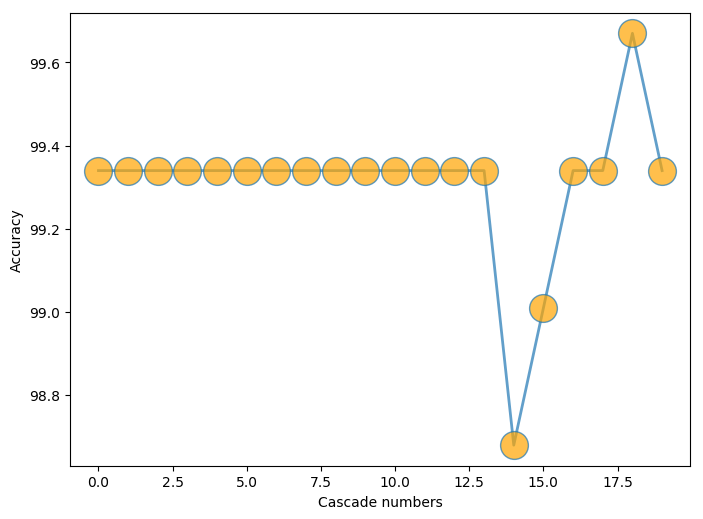

In [17]:
print ("Opt_Cascade_num =",Accuracy.index(max(Accuracy)), " Accuracy =", max(Accuracy) ,
       "Time =" , np.sum(t[0:Accuracy.index(max(Accuracy))+1]))

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(8, 6), dpi=100)
plt.plot(Accuracy, '-o', ms=20, lw=2, alpha=0.7, mfc='orange')
plt.ylabel('Accuracy')
plt.xlabel('Cascade numbers')
plt.show()

In [18]:
Accuracy

[99.34,
 99.34,
 99.34,
 99.34,
 99.34,
 99.34,
 99.34,
 99.34,
 99.34,
 99.34,
 99.34,
 99.34,
 99.34,
 99.34,
 98.68,
 99.01,
 99.34,
 99.34,
 99.67,
 99.34]